In [ ]:
import tensorflow as tf
from tensorflow import keras as ks
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load data
(x_train, y_train), (x_test, y_test) = ks.datasets.mnist.load_data()

# Reshape input to fit CNN [samples, height, width, channels]
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# CNN Model
model_cnn = ks.Sequential([
    ks.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    ks.layers.MaxPooling2D((2, 2)),
    ks.layers.Conv2D(64, (3, 3), activation='relu'),
    ks.layers.MaxPooling2D((2, 2)),
    ks.layers.Flatten(),
    ks.layers.Dense(64, activation='relu'),
    ks.layers.Dense(10, activation='softmax')
])

# Compile
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
model_cnn.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# Evaluate
test_loss, test_acc = model_cnn.evaluate(x_test_cnn, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Predict
y_pred_probs = model_cnn.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 31ms/step - accuracy: 0.7654 - loss: 0.6395 - val_accuracy: 0.8710 - val_loss: 0.3618
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8658 - loss: 0.3880
Test Accuracy: 0.8625
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


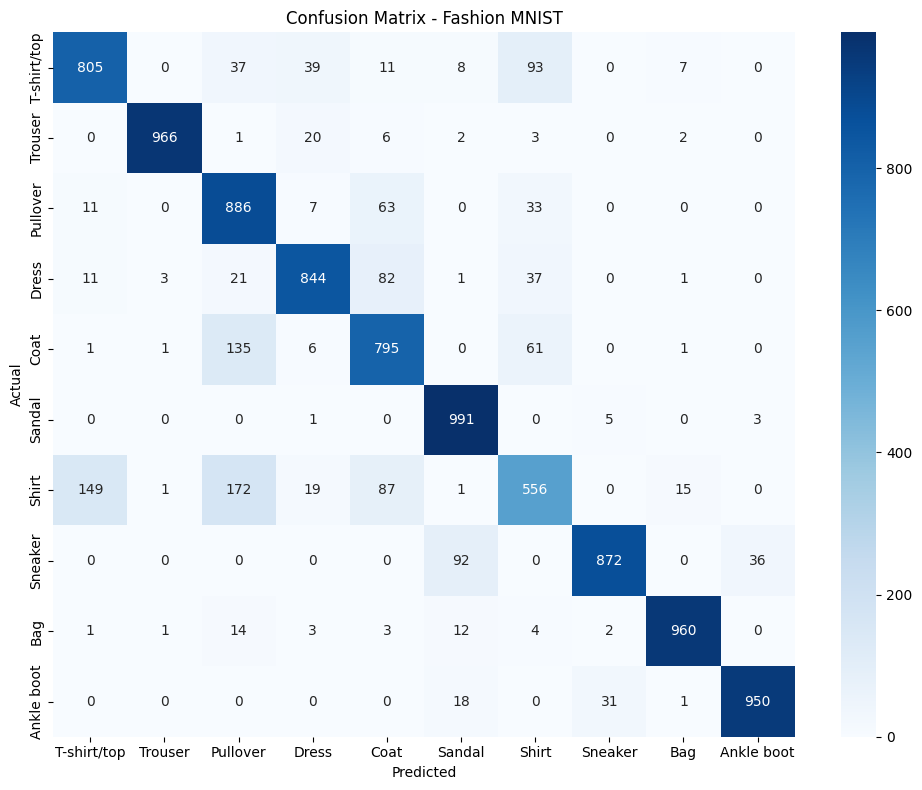

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.82      0.81      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.70      0.89      0.78      1000
       Dress       0.90      0.84      0.87      1000
        Coat       0.76      0.80      0.78      1000
      Sandal       0.88      0.99      0.93      1000
       Shirt       0.71      0.56      0.62      1000
     Sneaker       0.96      0.87      0.91      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



In [3]:
import tensorflow as tf
from tensorflow import keras as ks
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = ks.datasets.fashion_mnist.load_data()

# Normalize pixel values and reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define CNN model
model = ks.Sequential([
    ks.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    ks.layers.MaxPooling2D((2, 2)),
    ks.layers.Conv2D(64, (3, 3), activation='relu'),
    ks.layers.MaxPooling2D((2, 2)),
    ks.layers.Flatten(),
    ks.layers.Dense(128, activation='relu'),
    ks.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=1, validation_split=0.1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Fashion MNIST")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print("Classification Report:\n", report)
